In [95]:
import numpy as np
import pandas as pd
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from scipy.spatial import distance
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats

In [2]:
hall=pd.read_csv('garlin.csv', low_memory=False)

In [3]:
df=hall.copy()

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"

font_prop = font_manager.FontProperties(fname=font_path)

plt.rcParams["font.family"] = font_prop.get_name()

In [6]:
import koreanize_matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' ## 그림 더 선명하게

### 좌석 찾기 준비

In [7]:
seat=pd.read_csv('seat_coor.csv')

In [8]:
seat2=seat.loc[seat.seat!='무대', ['x','y']]

In [9]:
seat2['label']=0

### 시각화 연습

### 장르별 시각화

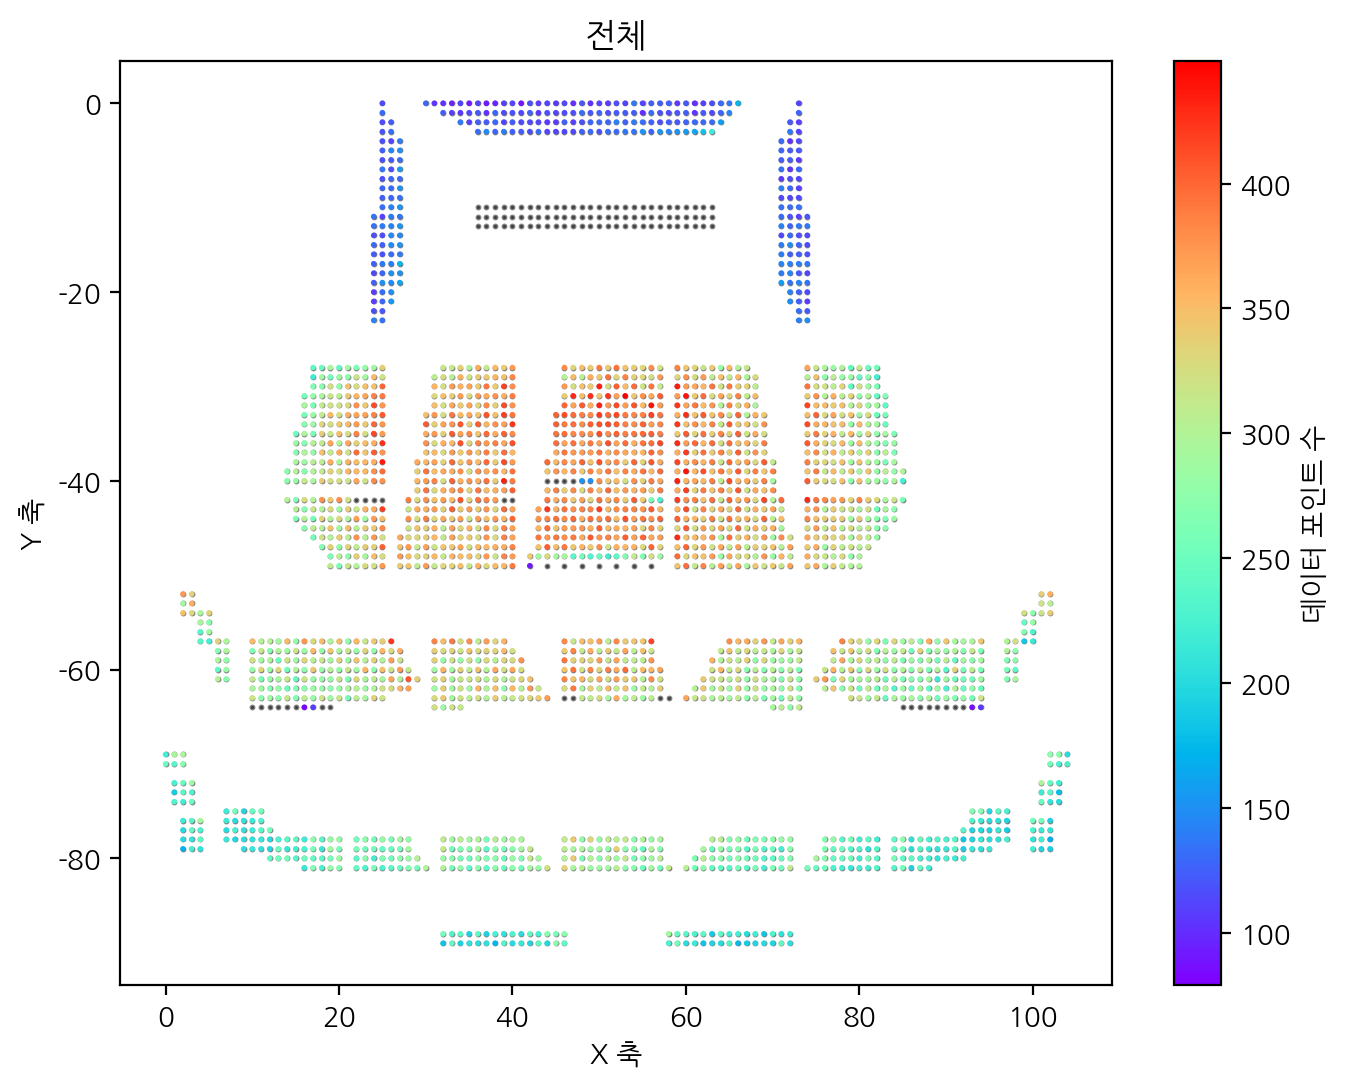

In [129]:
plt.figure(figsize=(8, 6))
condition=(df['ticket_cancel']==0)
x_coords2, y_coords2 = seat['x'] , seat['y']
plt.scatter(x_coords2, y_coords2, marker='o', facecolors='black', s=1.2, alpha=0.5)
grouped2 = df[condition].groupby(['x', 'y']).size().reset_index(name='count')
z_scores = np.abs(stats.zscore(grouped2['count']))
threshold = 2.56
grouped = grouped2[(z_scores < threshold)]
max_count = grouped['count'].max()
min_count = grouped['count'].min()
norm = plt.Normalize(min_count, max_count)
cmap=plt.get_cmap('rainbow')
sc = plt.scatter(grouped['x'], grouped['y'], c=grouped['count'], cmap=cmap, norm=norm, s=1)
plt.colorbar(sc, label='데이터 포인트 수')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.title('전체')
plt.show()

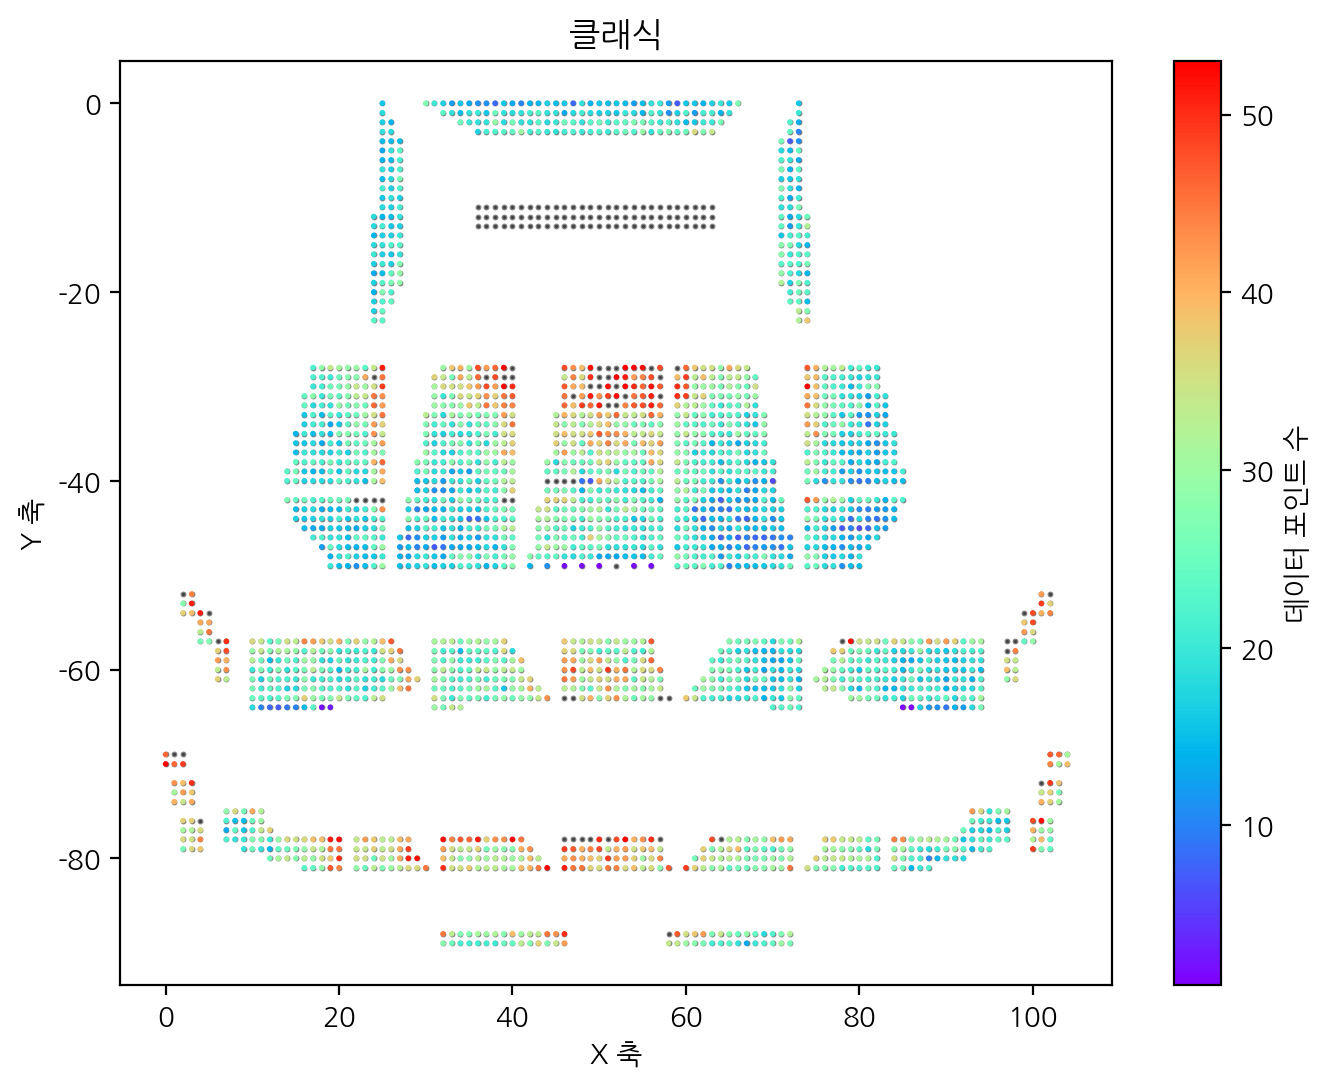

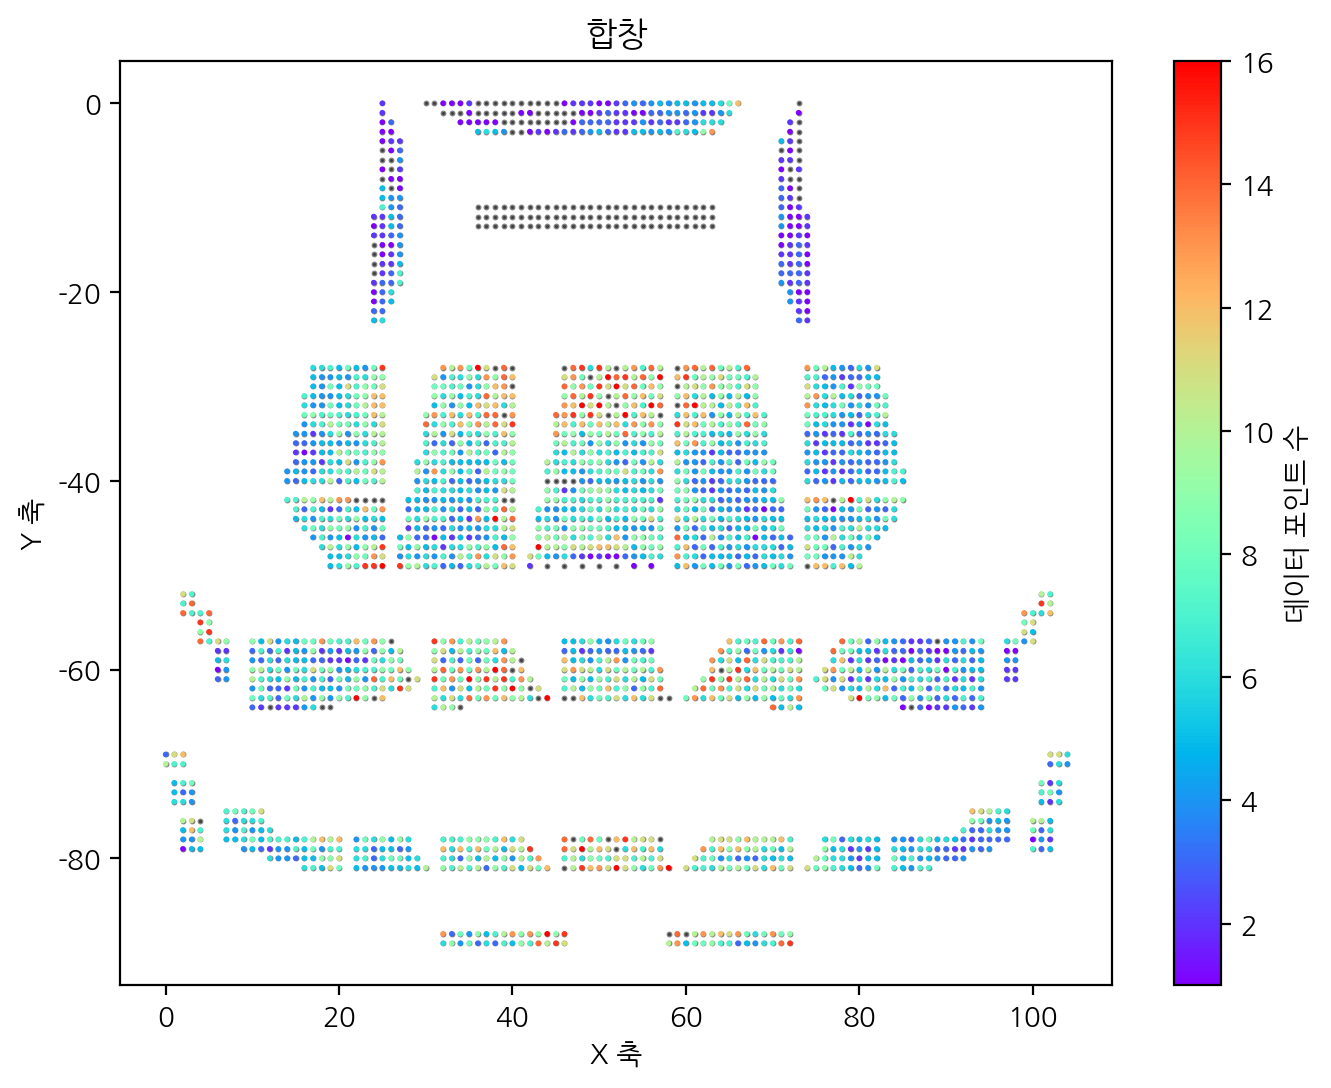

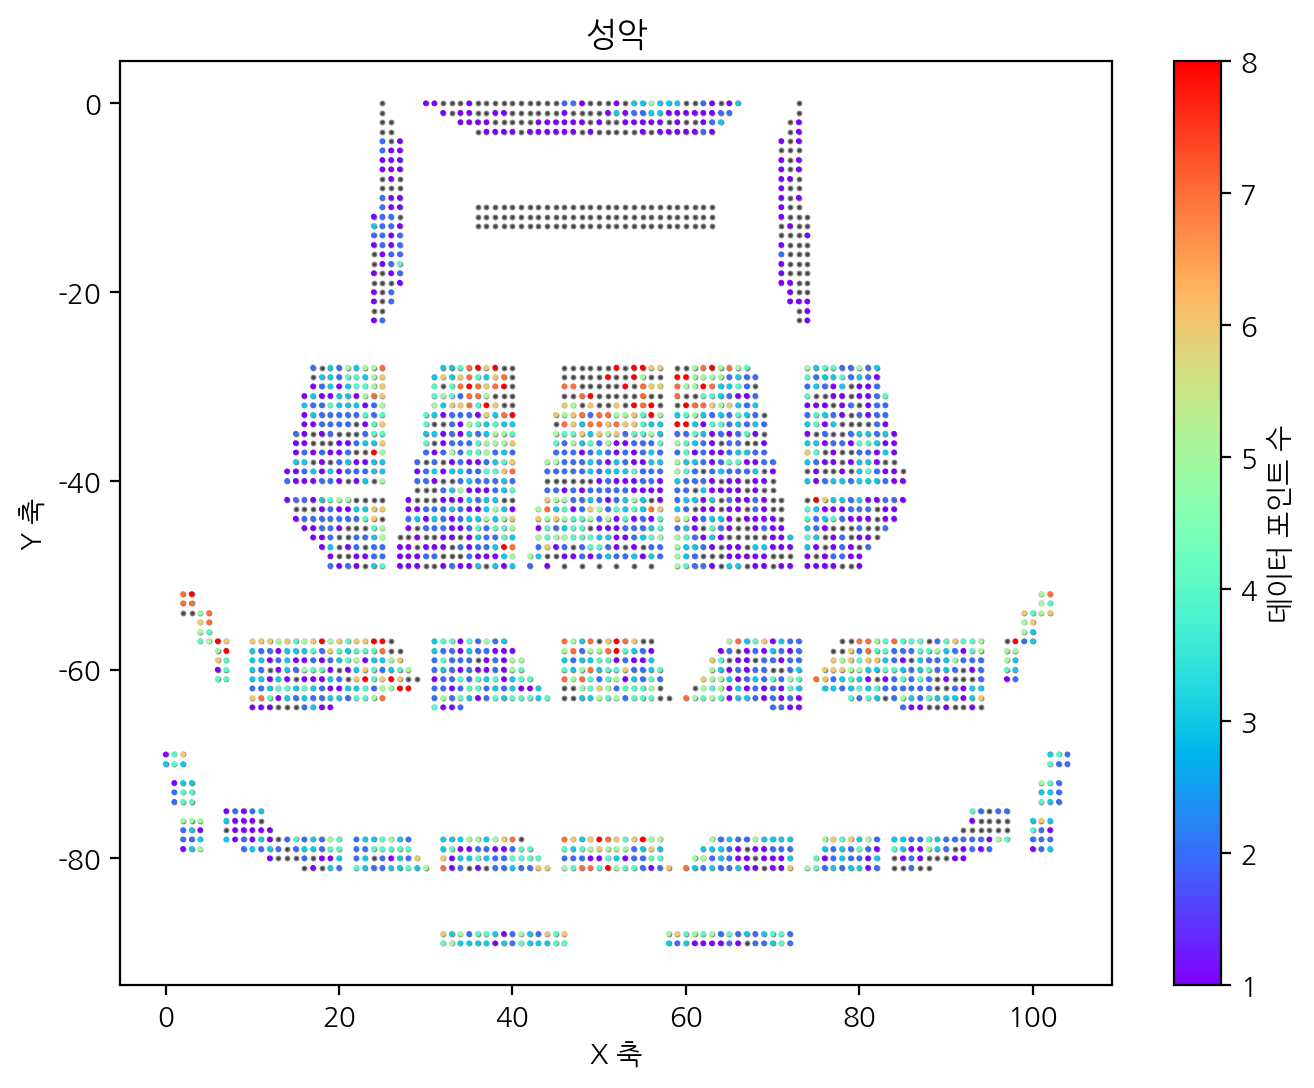

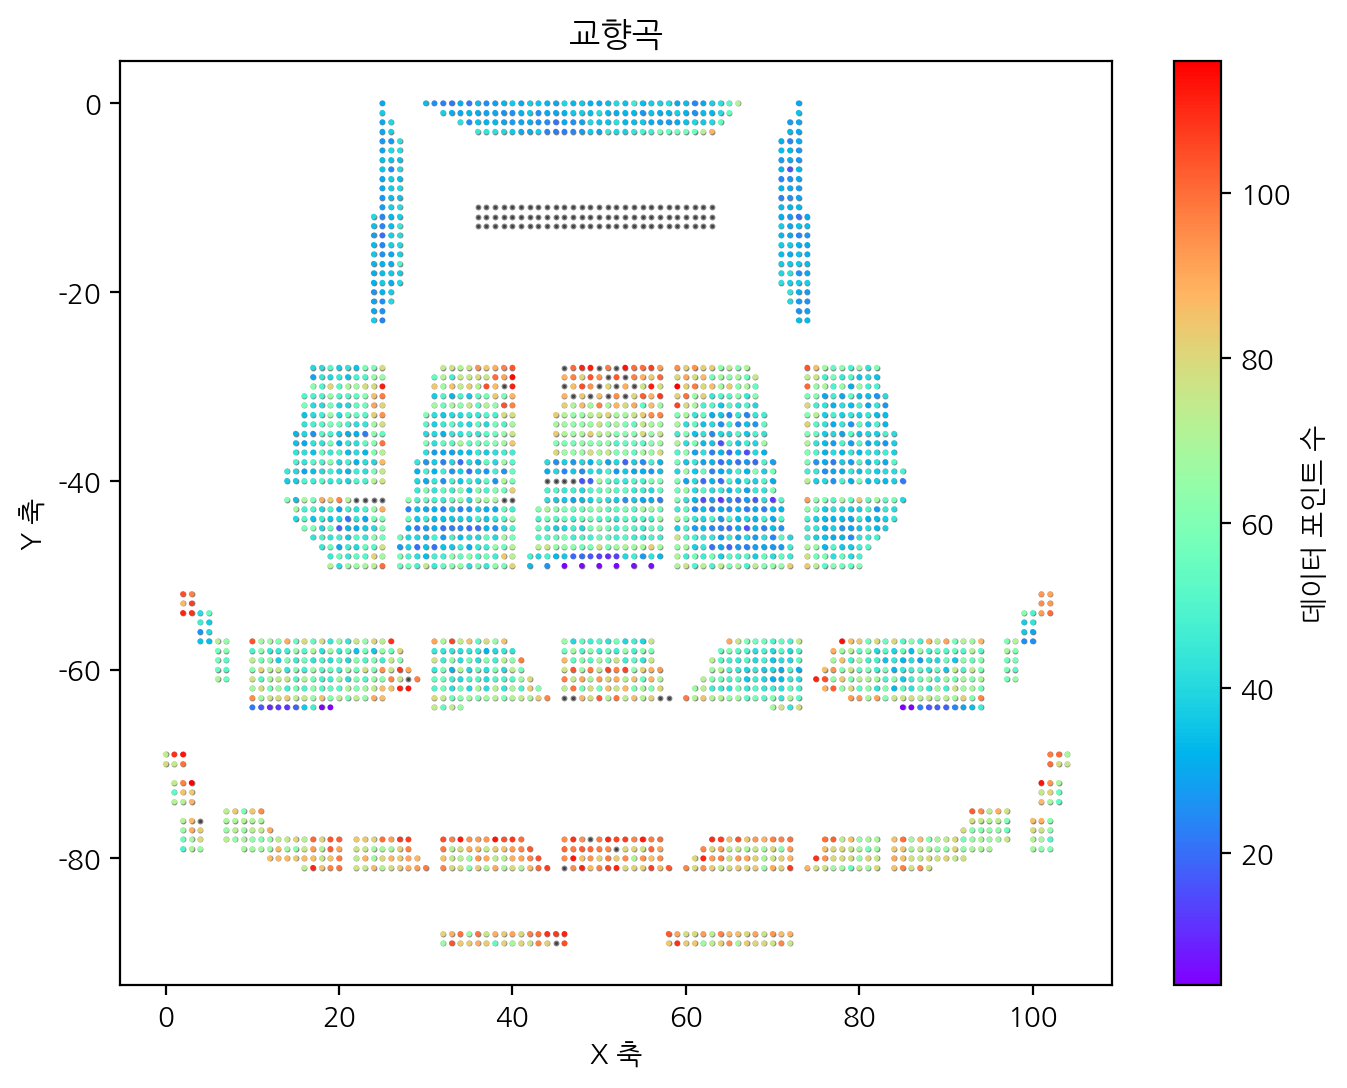

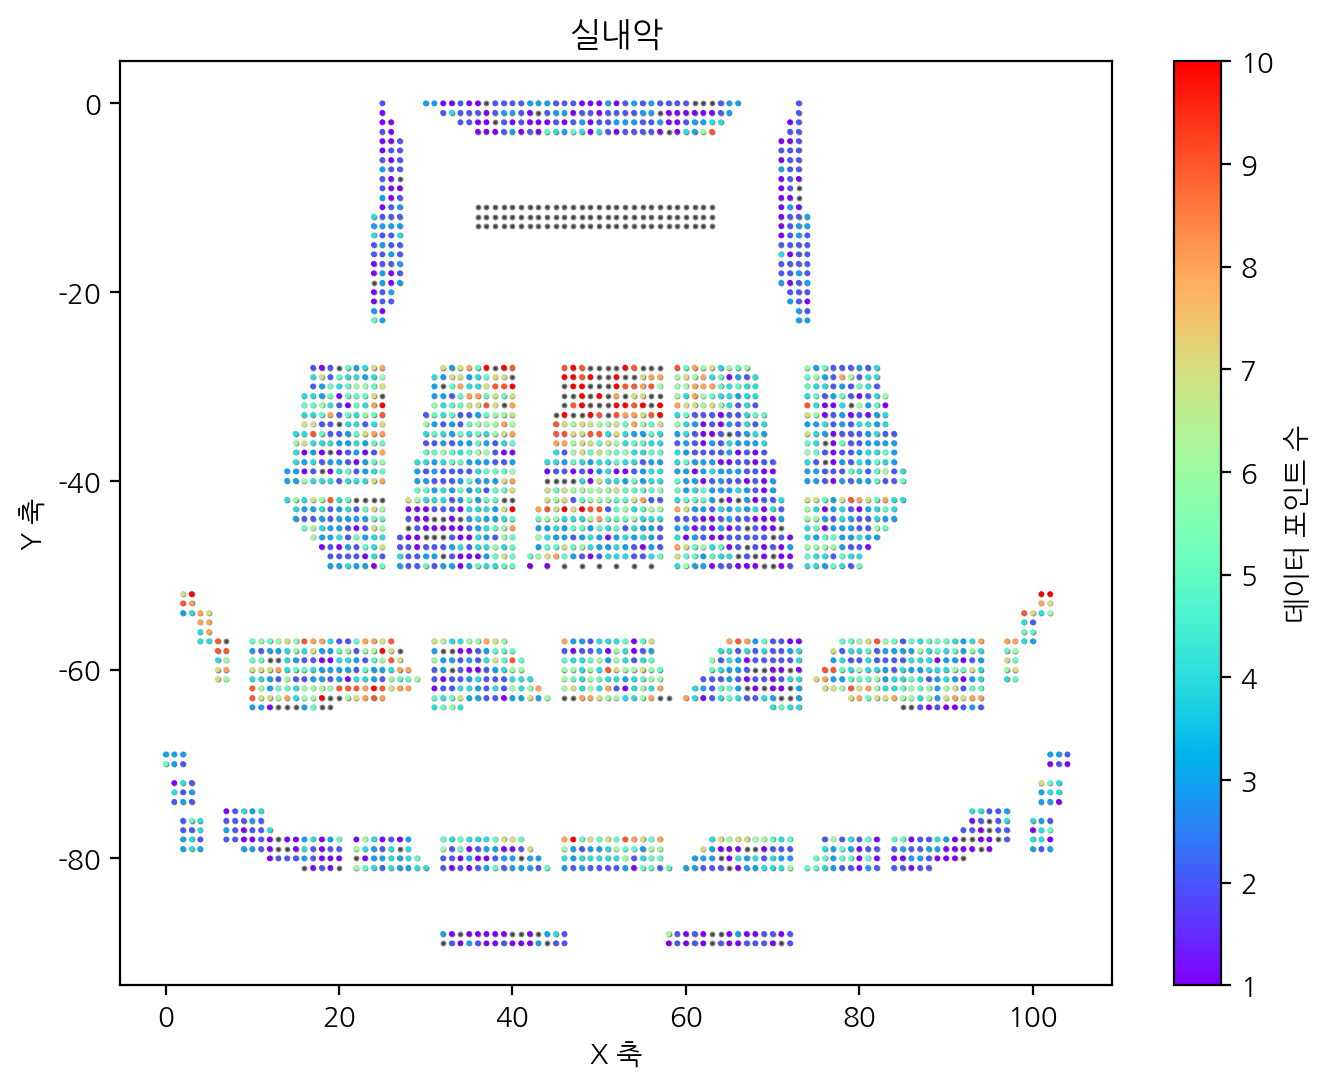

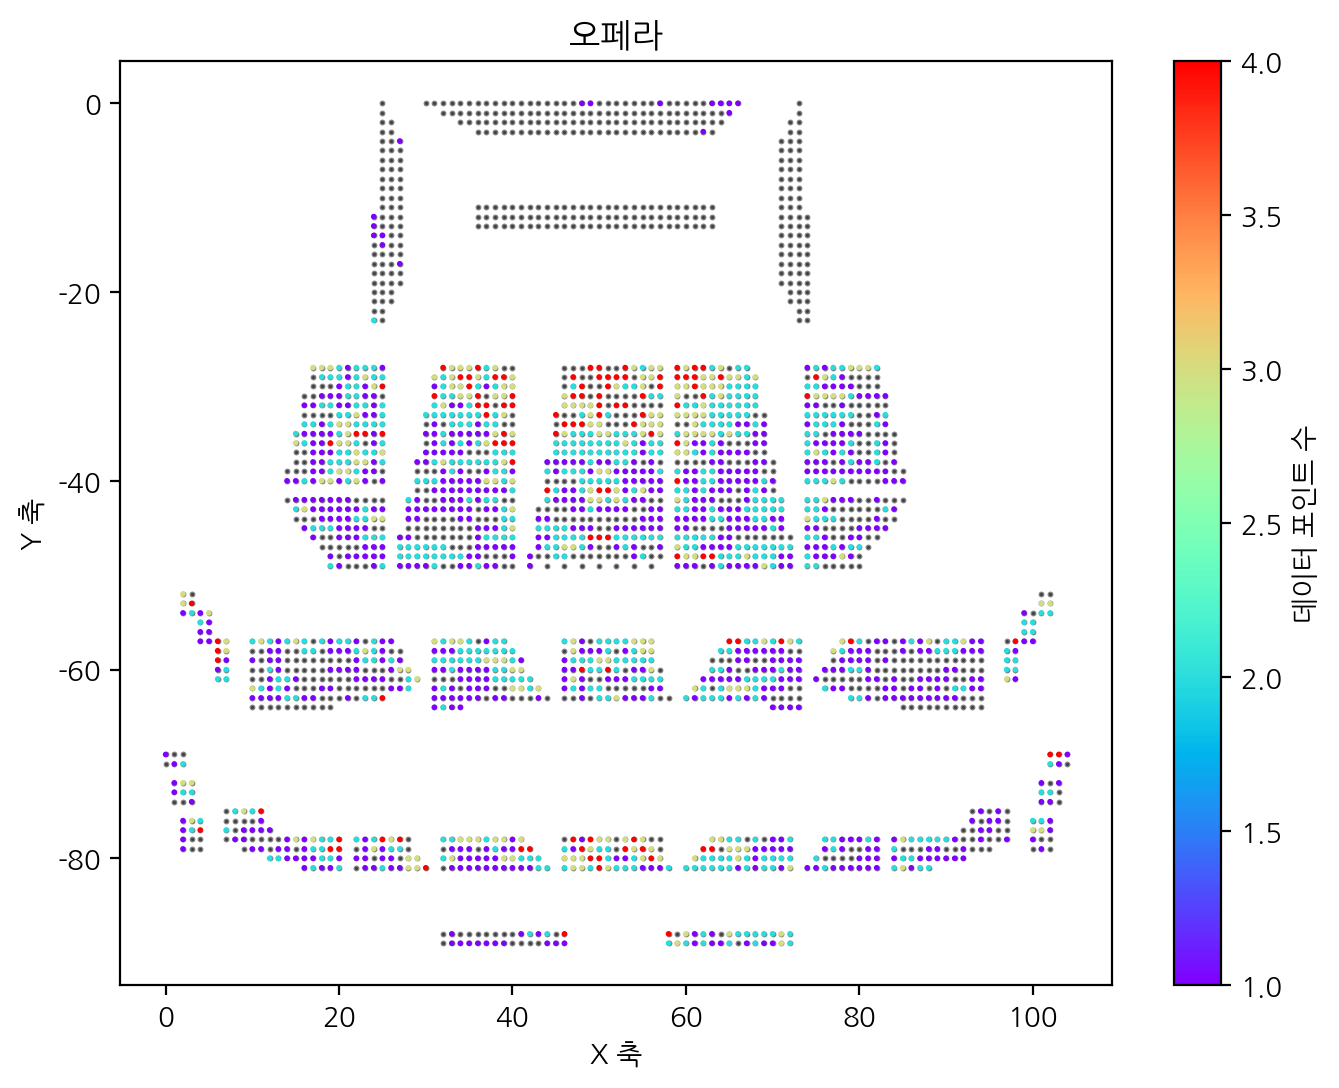

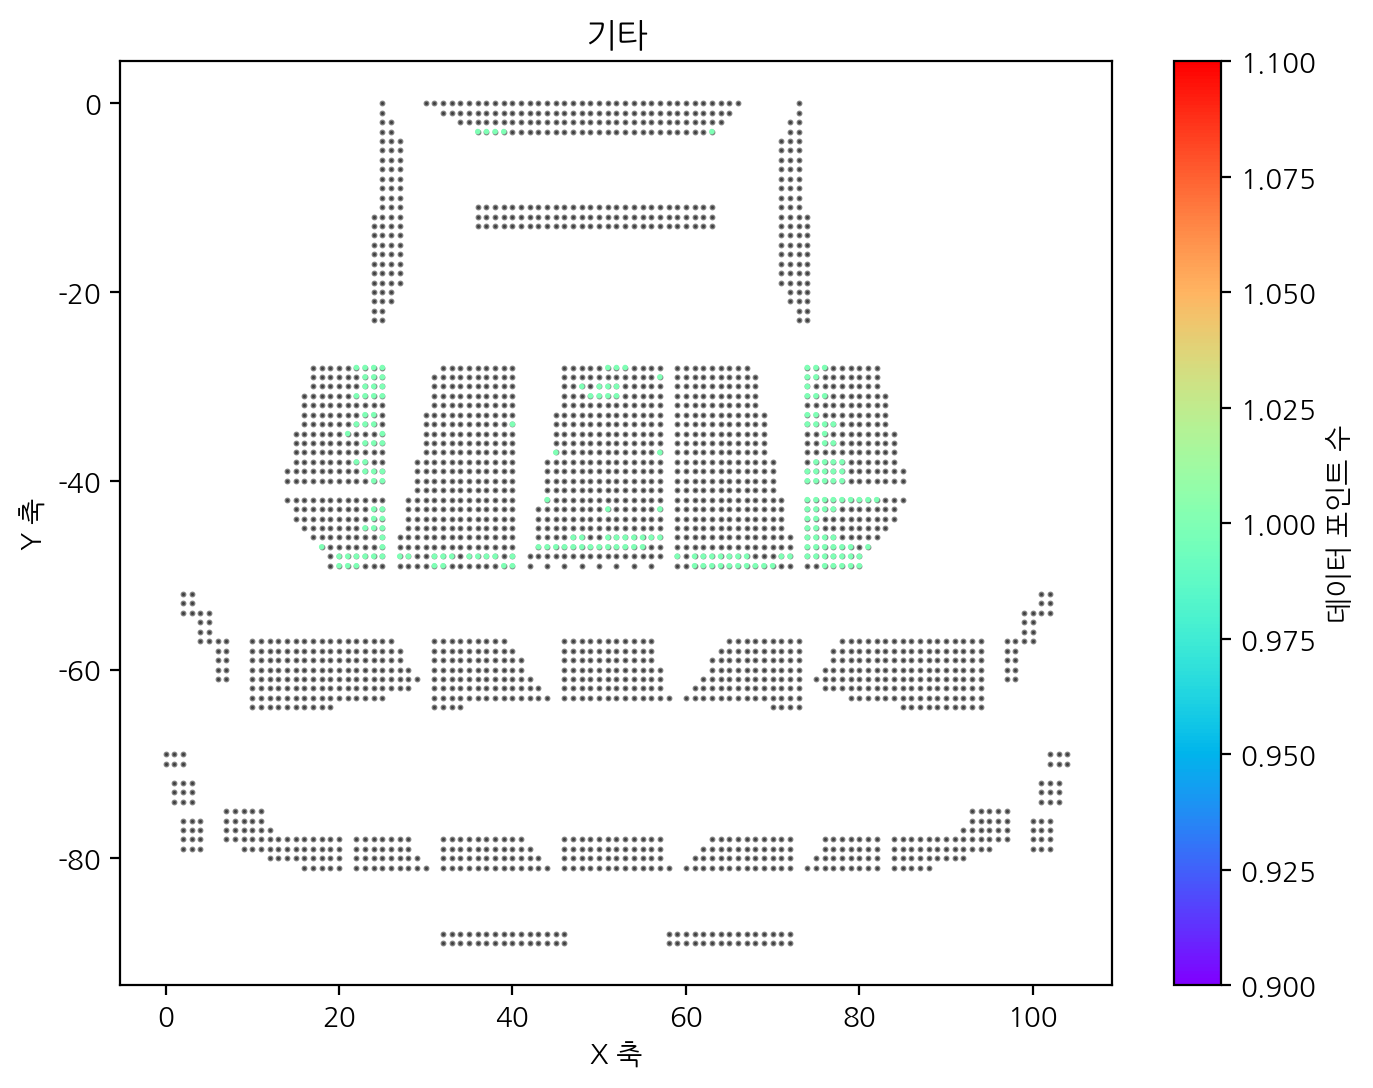

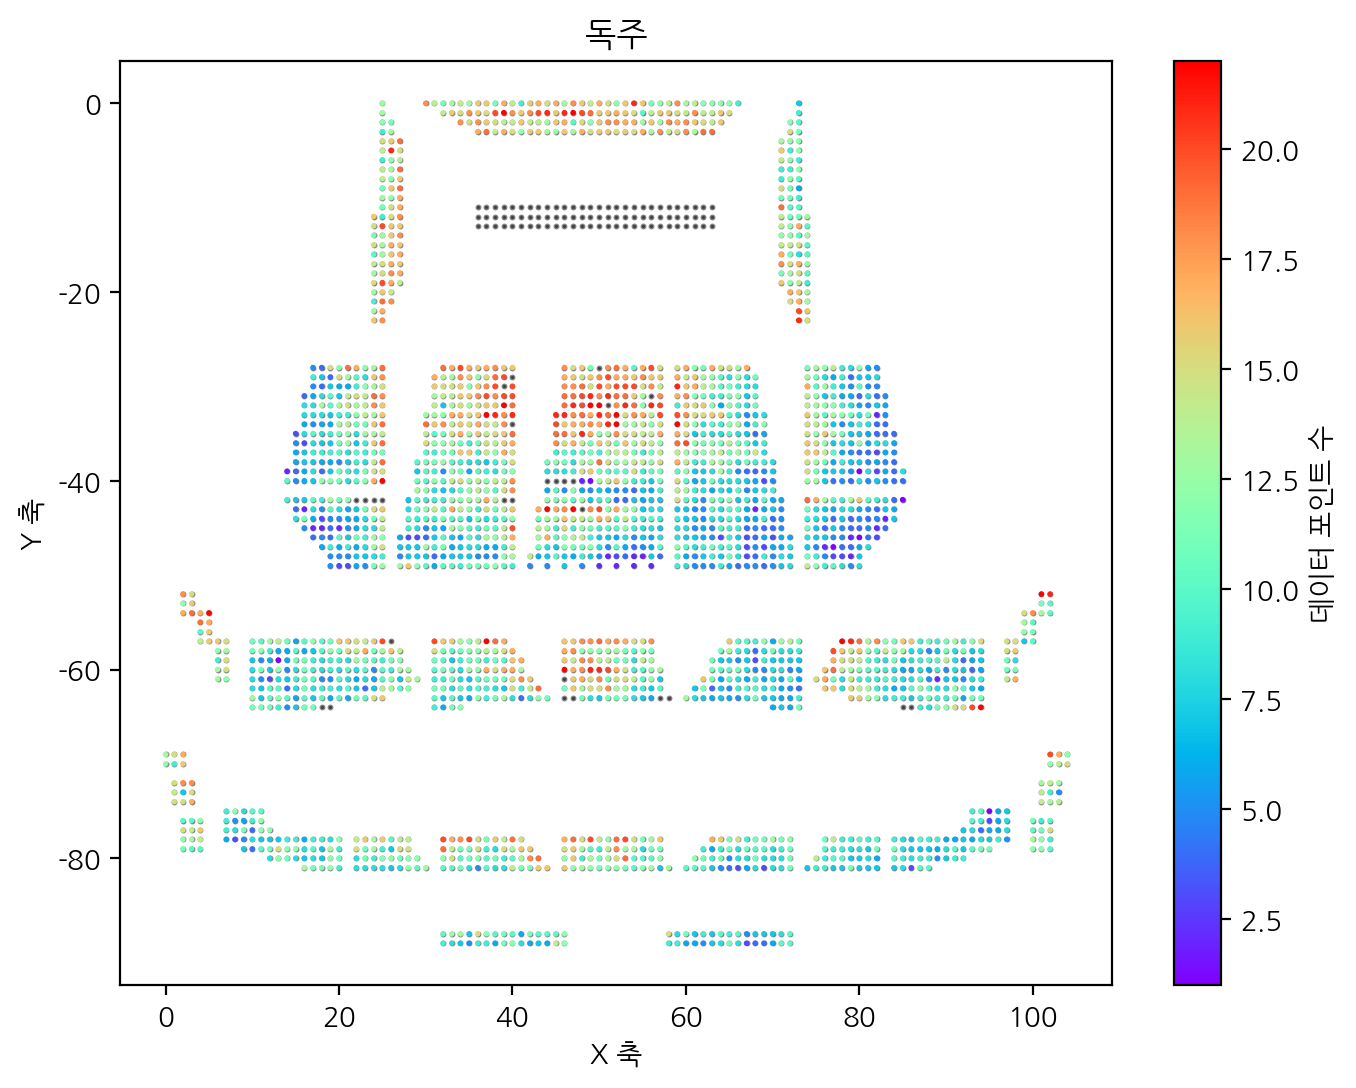

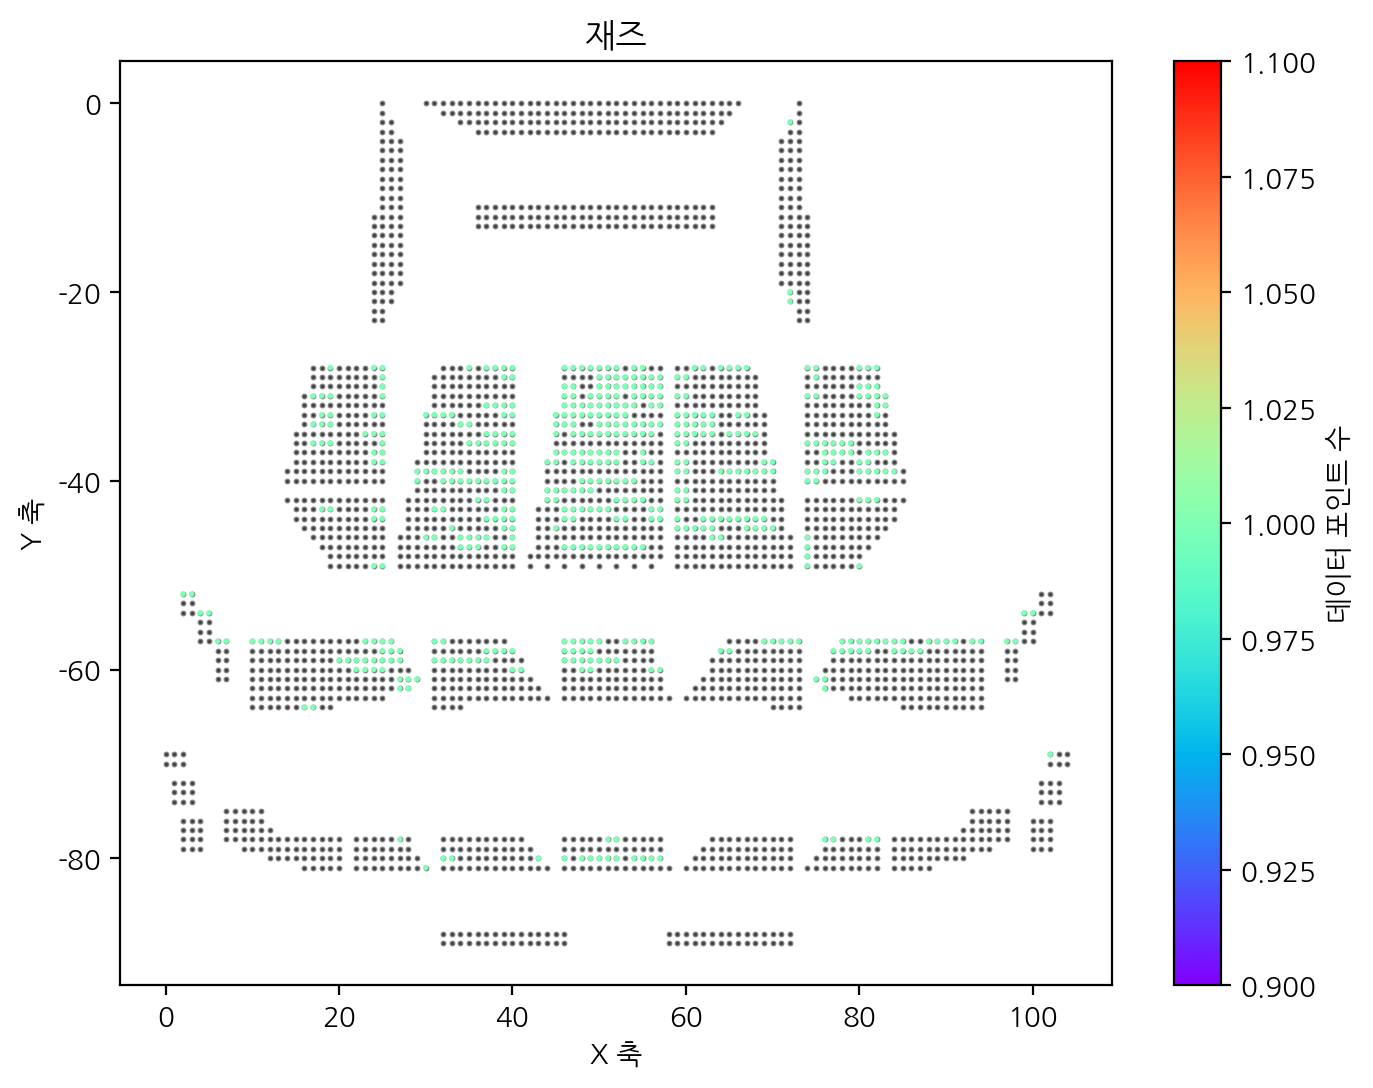

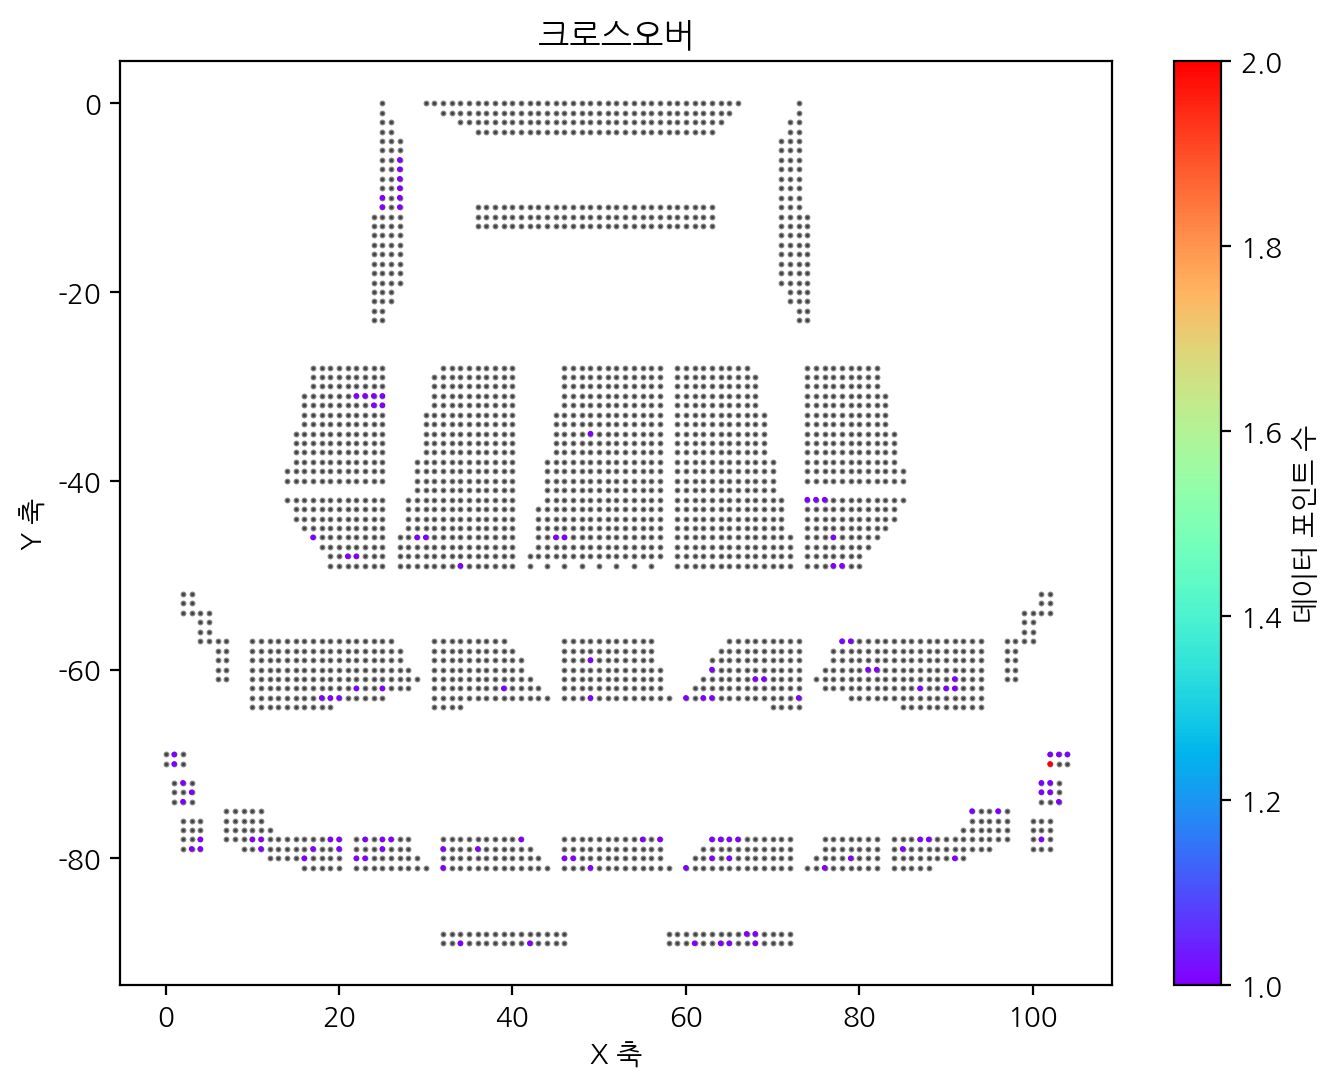

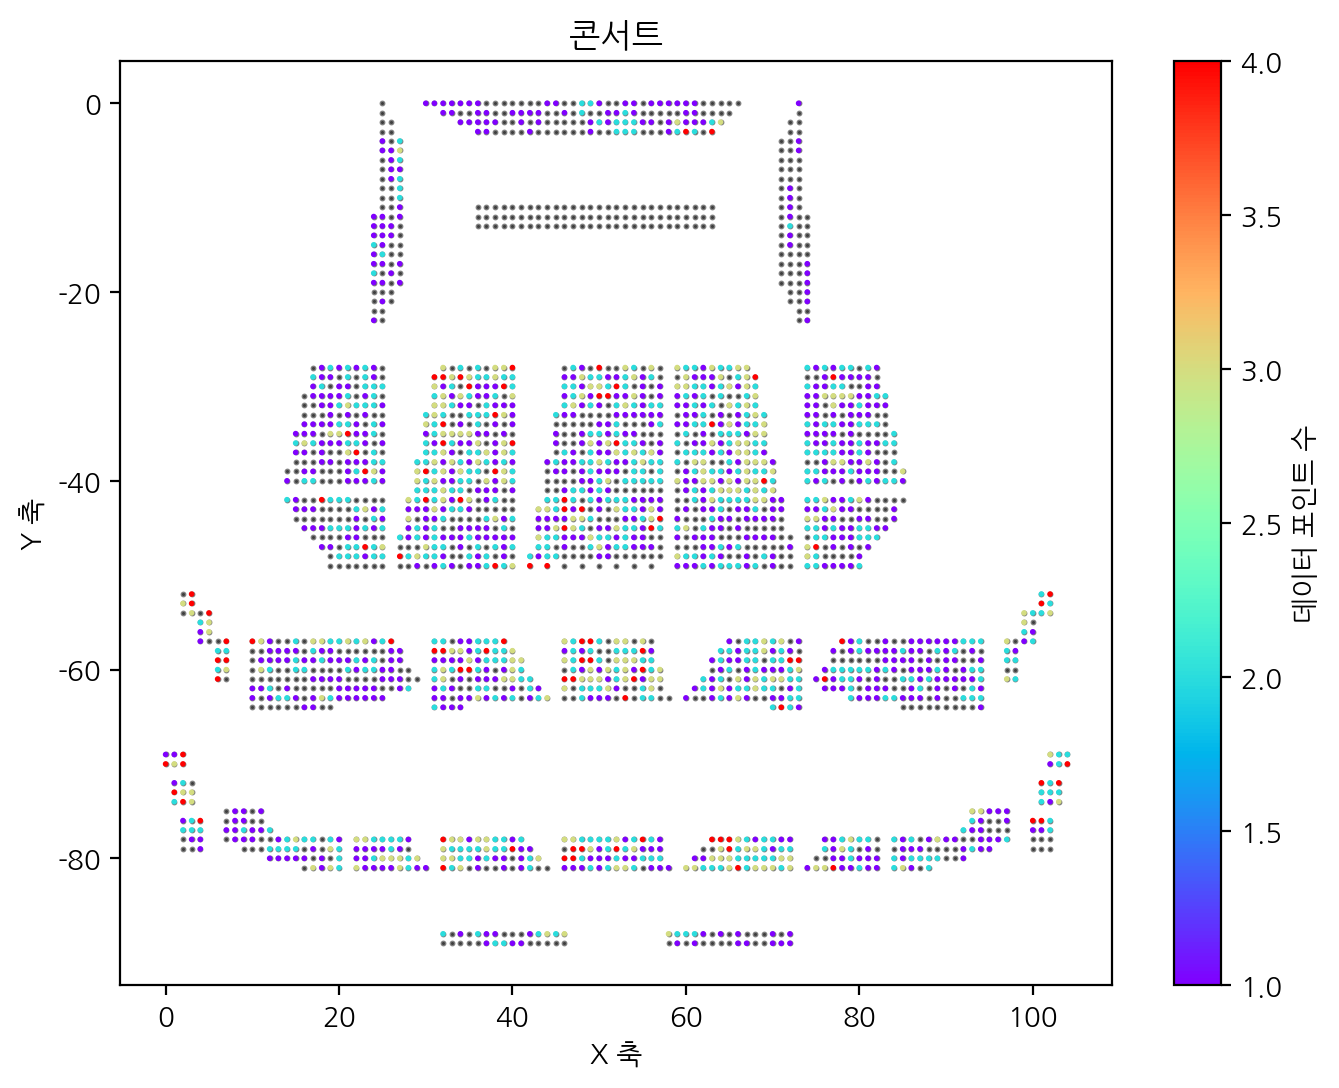

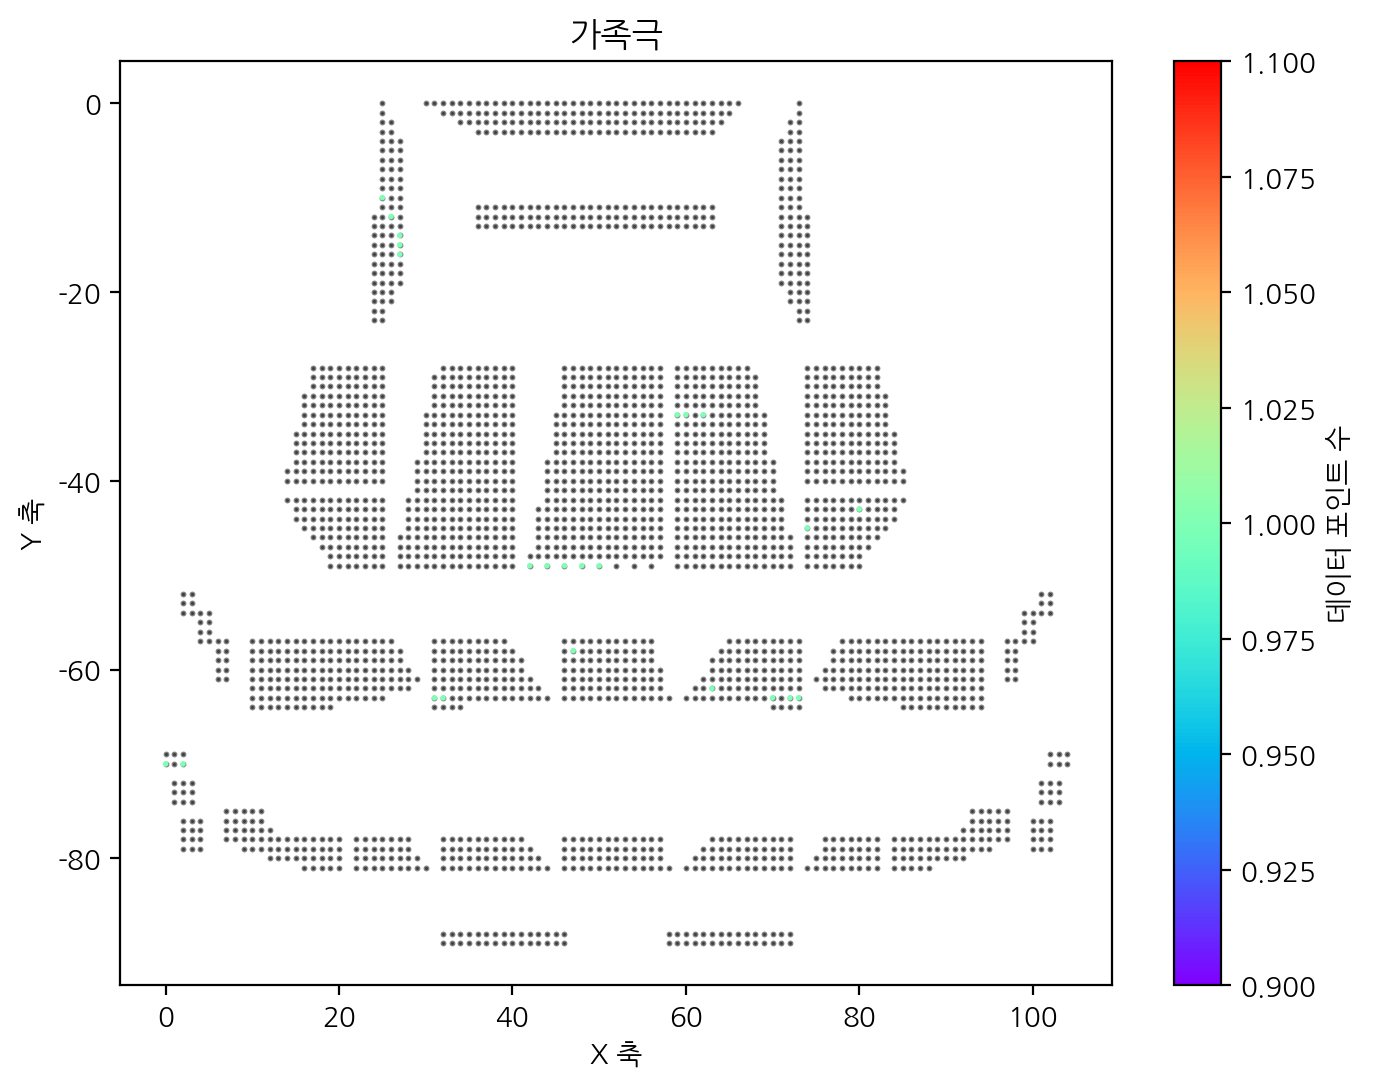

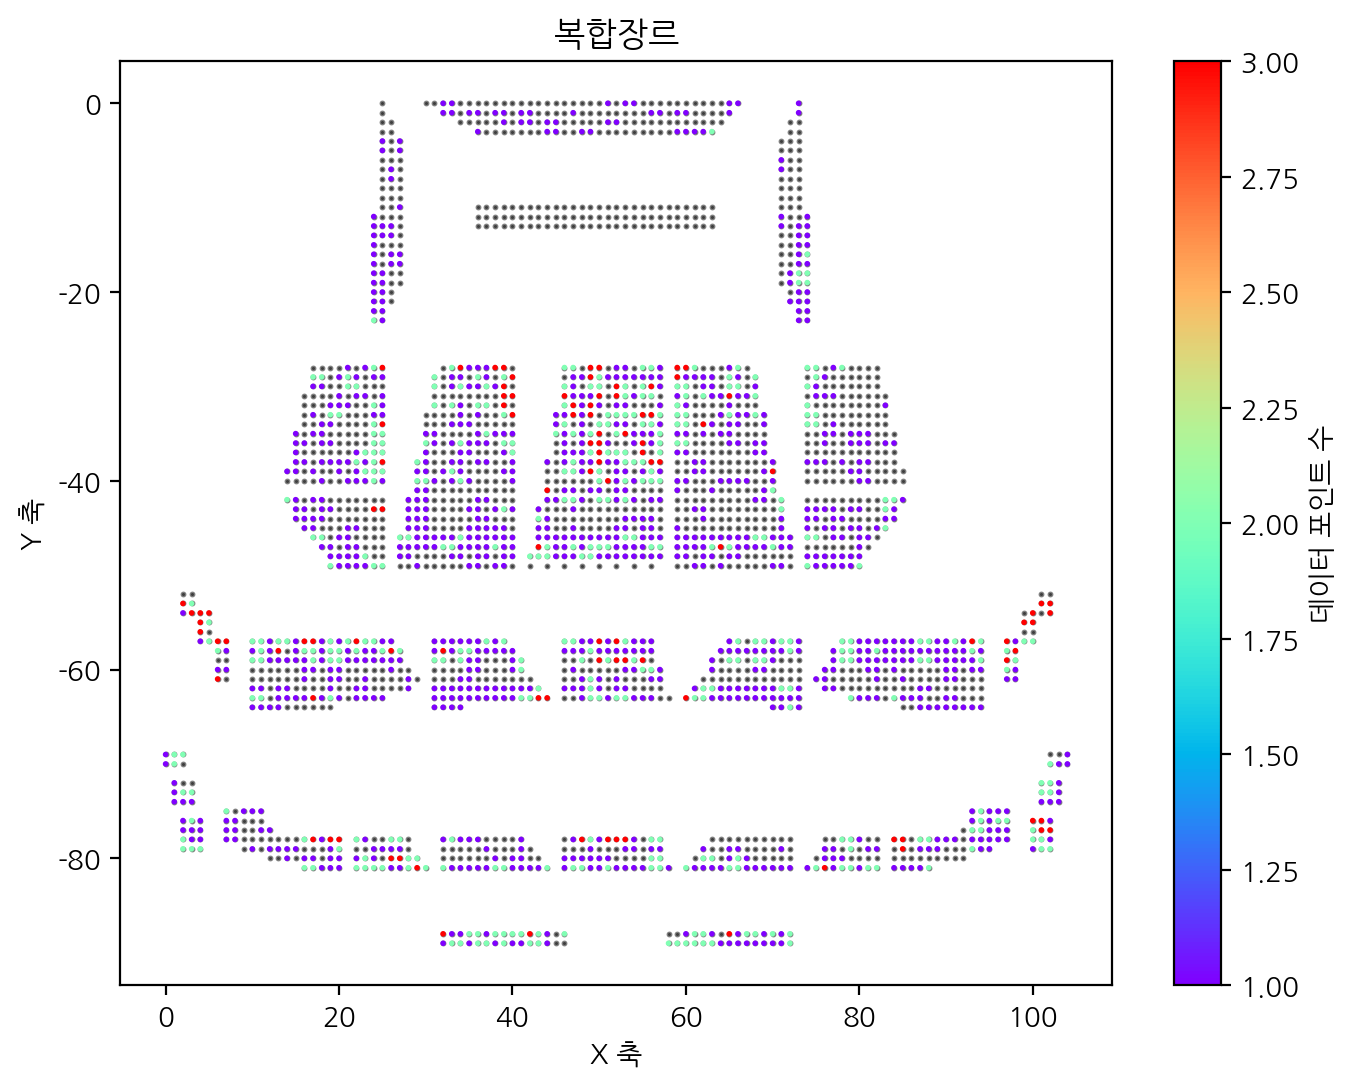

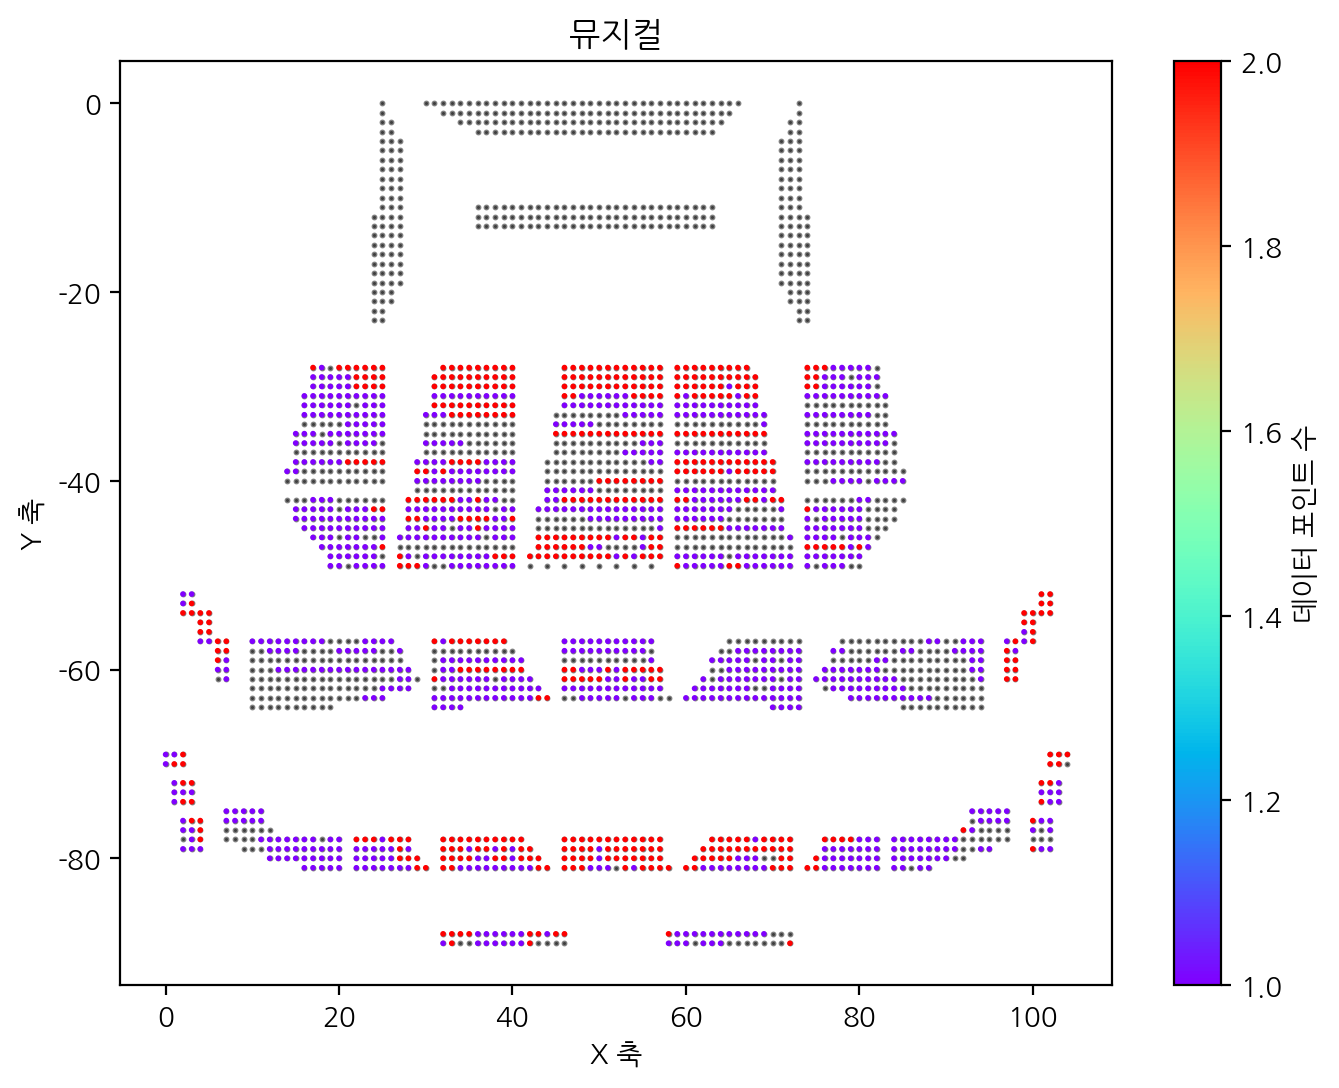

In [130]:
for genre in df.genre.unique():
    plt.figure(figsize=(8, 6))
    condition=(df['genre']==genre)&(df['ticket_cancel']==0)&(df['price']!=0)
    x_coords2, y_coords2 = seat['x'] , seat['y']
    plt.scatter(x_coords2, y_coords2, marker='o', facecolors='black', s=1.2, alpha=0.5)
    grouped2 = df[condition].groupby(['x', 'y']).size().reset_index(name='count')
    z_scores = np.abs(stats.zscore(grouped2['count']))
    threshold = 2.56
    if len(df[df.genre==genre]['play_date_time'].unique())>5:
        grouped = grouped2[(z_scores < threshold)]
    else:
        grouped = grouped2
    max_count = grouped['count'].max()
    min_count = grouped['count'].min()
    norm = plt.Normalize(min_count, max_count)
    cmap=plt.get_cmap('rainbow')
    sc = plt.scatter(grouped['x'], grouped['y'], c=grouped['count'], cmap=cmap, norm=norm, s=1)
    plt.colorbar(sc, label='데이터 포인트 수')
    plt.xlabel('X 축')
    plt.ylabel('Y 축')
    plt.title(f'{genre}')
    plt.show()

In [121]:
df.columns

Index(['age', 'gender', 'tran_date', 'tran_time', 'play_date', 'play_st_time',
       'seat', 'price', 'ticket_cancel', 'discount_type', 'performance_code',
       'pre_open_date', 'open_date', 'genre', 'running_time', 'intermission',
       'real_play_date', 'discount_percent', 'rev_dis', 'title', 'hold',
       'agency', 'sponser', 'R_price', 'S_price', 'A_price', 'B_price',
       'C_price', 'glee', 'normal', 'first_level', 'second_level',
       'third_level', 'all', 'seat_level', 'play_date_time', 'floor', 'block',
       'seat_line', 'seat_number', 'x', 'y', 'grade', 'tran_date_time',
       'label', 'cancel_yn', 'age_mb', 'gld_mb', 'bl_mb', 'grn_mb', 'loyalty',
       'seat_count', 'ticket_count', 'like', 'like_ratio', 'min_price',
       'rev_seat', 'afford', 'discount_number', 'cancel_num', 'tran_rate',
       'distance', 'days', 'seat_hot', 'angle_degrees'],
      dtype='object')

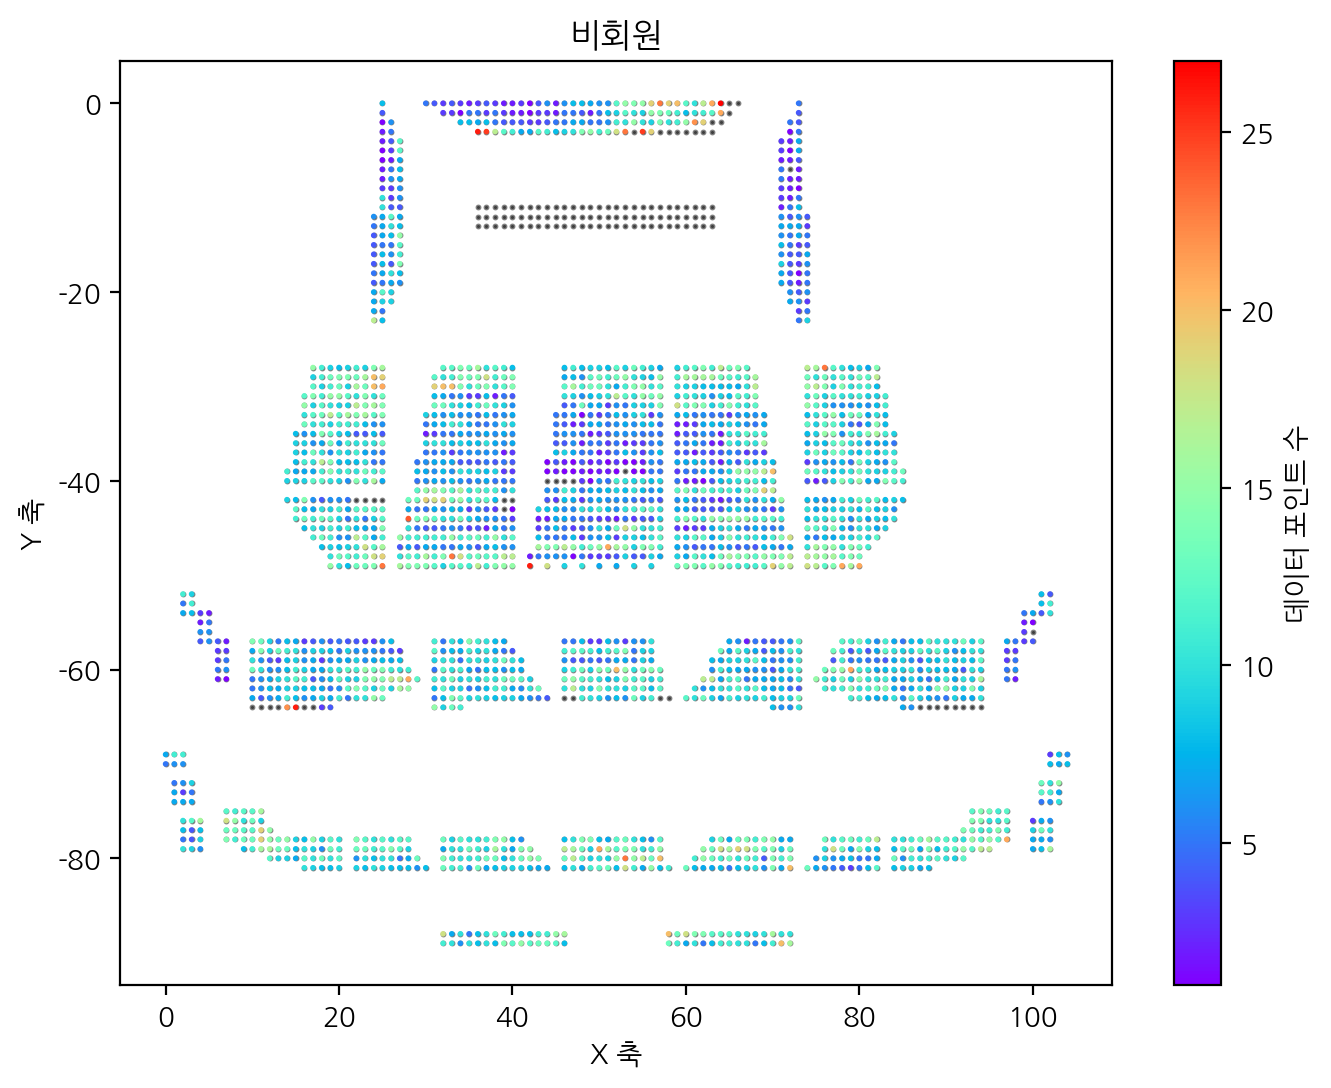

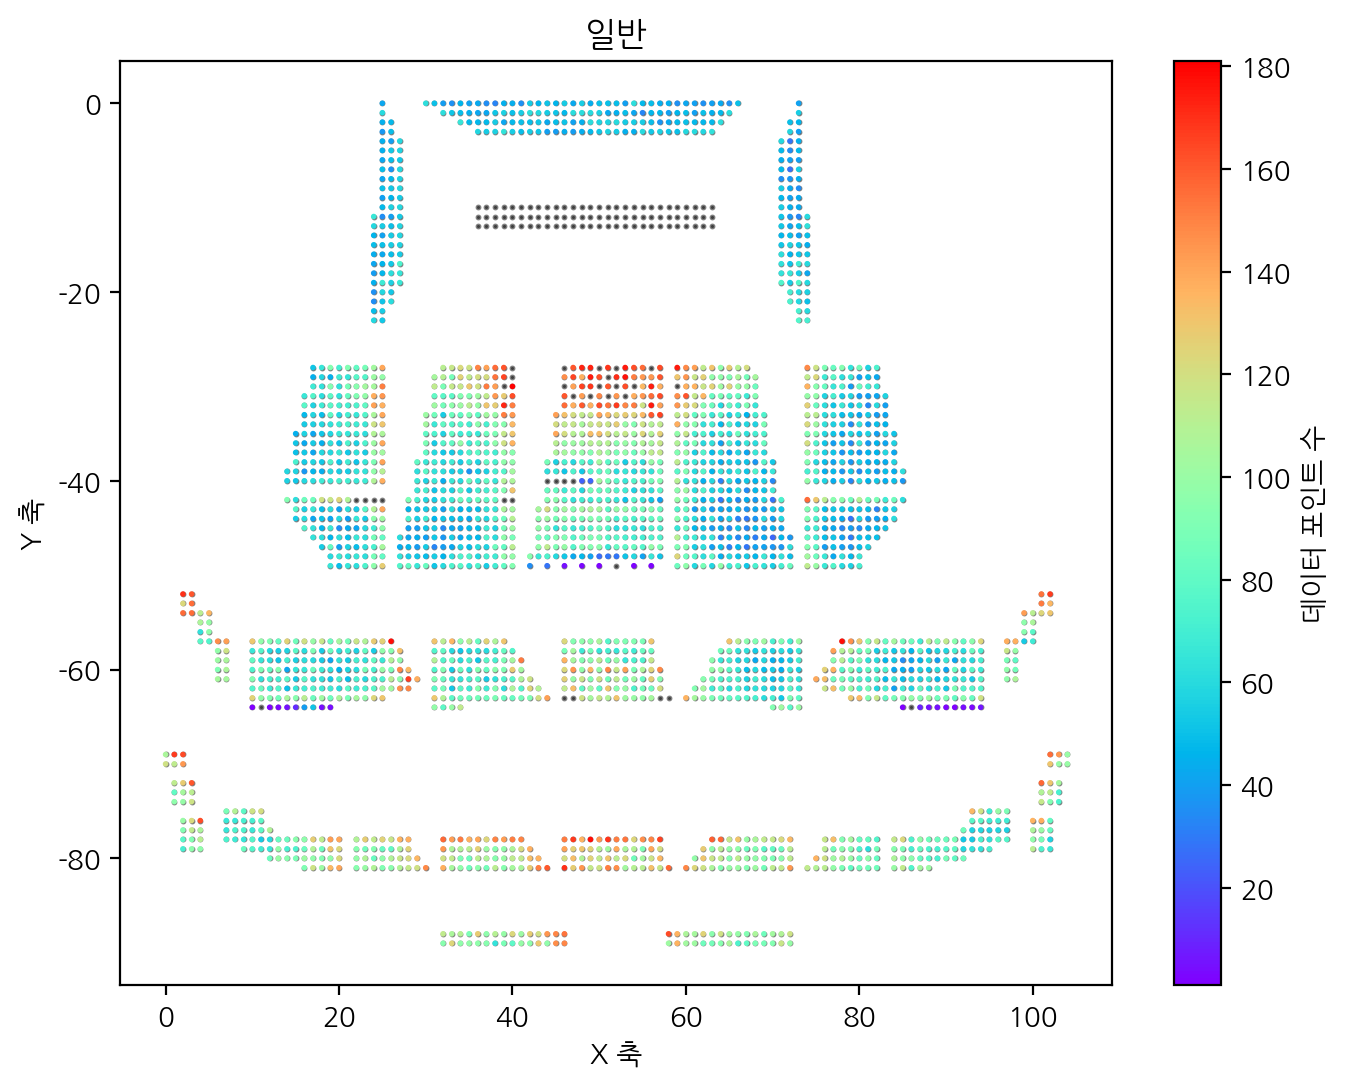

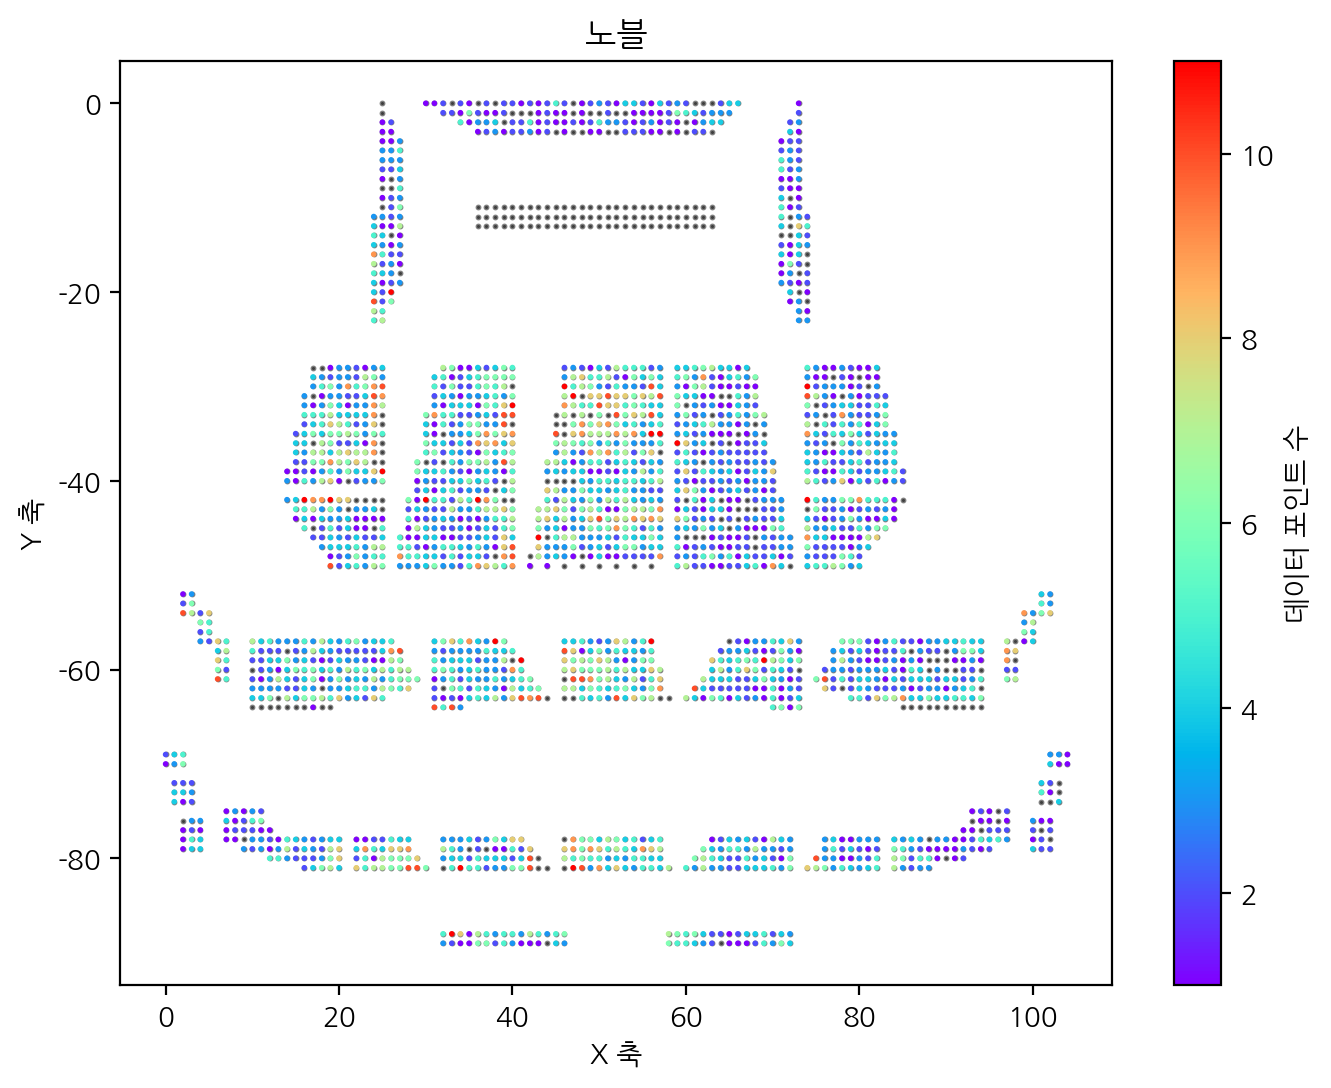

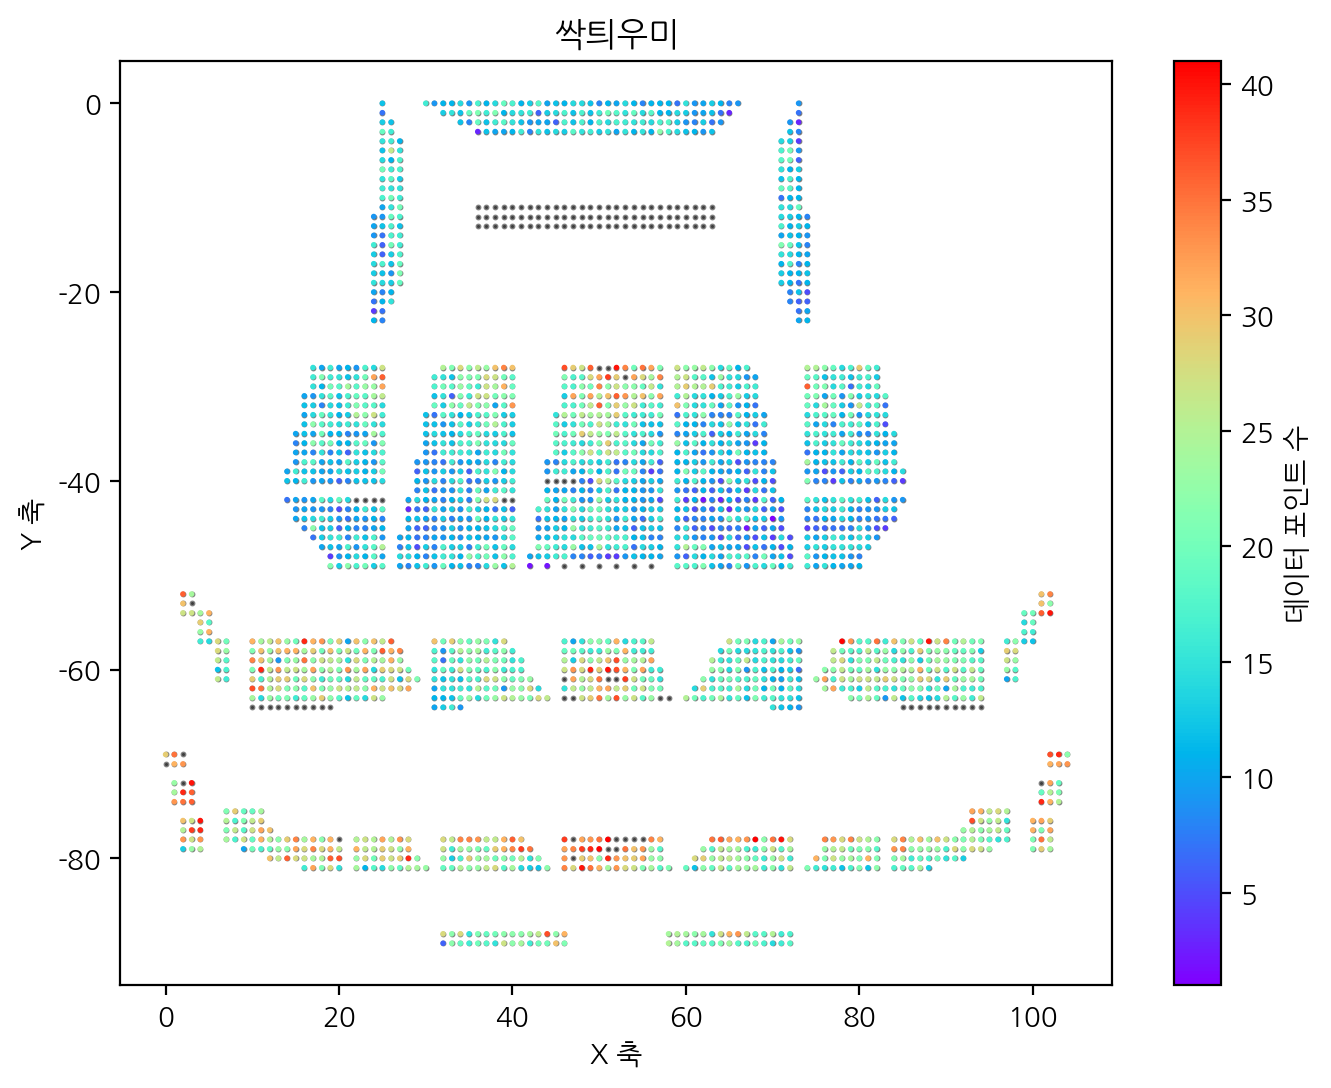

In [122]:
for col in df.age_mb.unique():
    plt.figure(figsize=(8, 6))
    condition=(df['age_mb']==col)&(df['ticket_cancel']==0)&(df['price']!=0)
    x_coords2, y_coords2 = seat['x'] , seat['y']
    plt.scatter(x_coords2, y_coords2, marker='o', facecolors='black', s=1.2, alpha=0.5)
    grouped2 = df[condition].groupby(['x', 'y']).size().reset_index(name='count')
    z_scores = np.abs(stats.zscore(grouped2['count']))
    threshold = 3
    grouped = grouped2[(z_scores < threshold)]
    max_count = grouped['count'].max()
    min_count = grouped['count'].min()
    norm = plt.Normalize(min_count, max_count)
    cmap=plt.get_cmap('rainbow')
    sc = plt.scatter(grouped['x'], grouped['y'], c=grouped['count'], cmap=cmap, norm=norm, s=1)
    plt.colorbar(sc, label='데이터 포인트 수')
    plt.xlabel('X 축')
    plt.ylabel('Y 축')
    plt.title(f'{col}')
    plt.show()

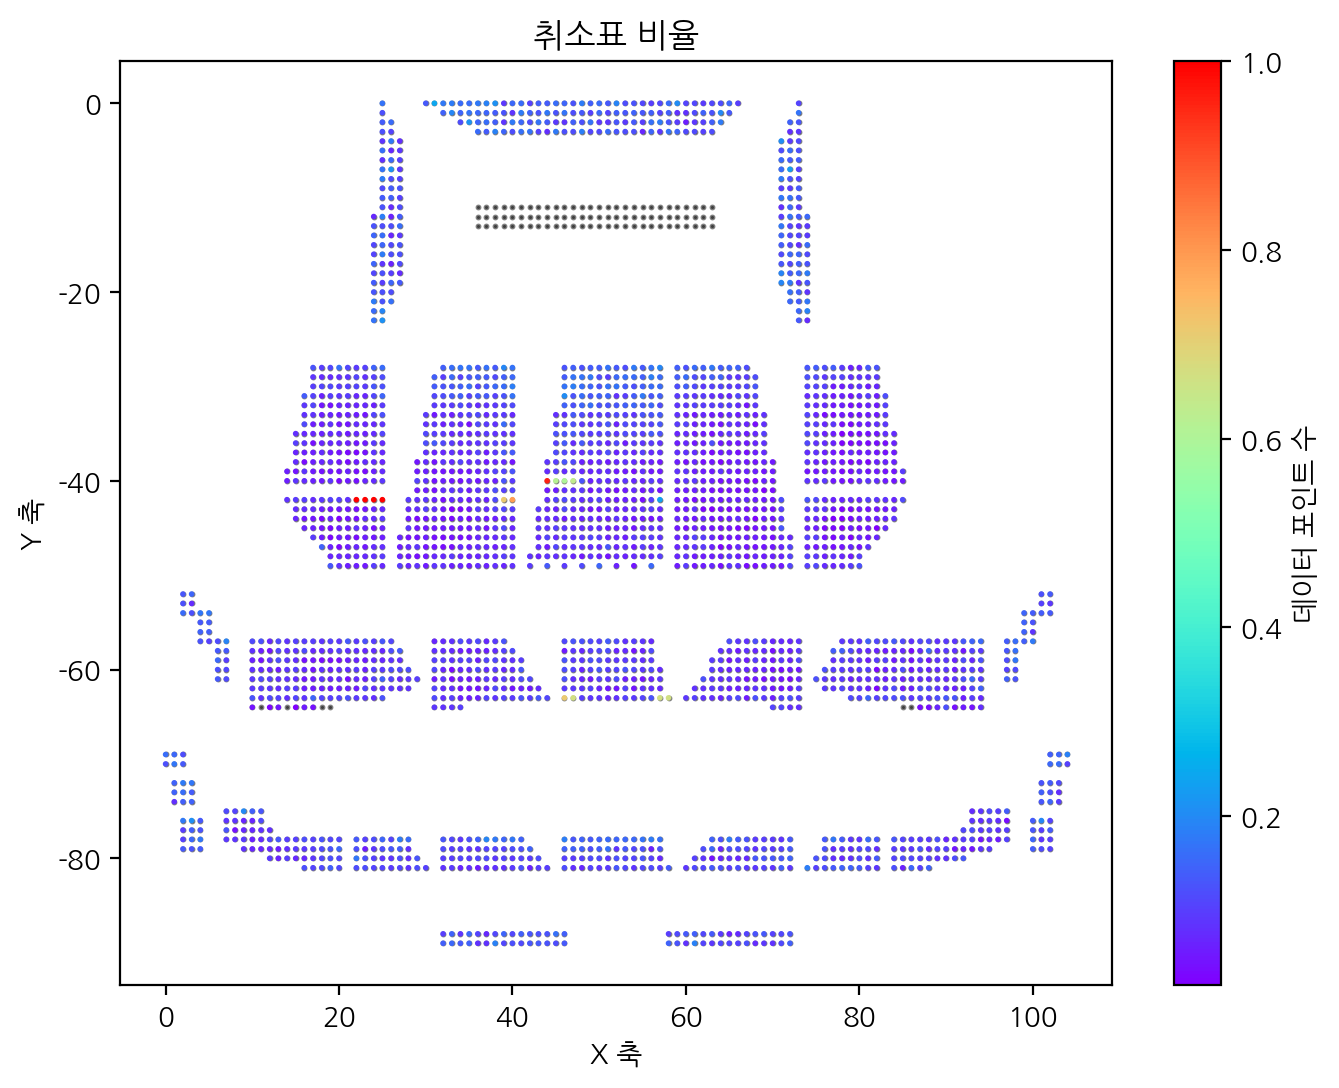

In [123]:
plt.figure(figsize=(8, 6))
condition=(df['cancel_yn']==1)
x_coords2, y_coords2 = seat['x'] , seat['y']
plt.scatter(x_coords2, y_coords2, marker='o', facecolors='black', s=1.2, alpha=0.5)
grouped1 = df[condition].groupby(['x', 'y']).size().reset_index(name='count1')
grouped2 = df.groupby(['x', 'y']).size().reset_index(name='count2')
grouped=pd.merge(grouped1, grouped2, how='left', on=['x','y'])
grouped['count']=grouped['count1']/grouped['count2']
max_count = grouped['count'].max()
min_count = grouped['count'].min()
norm = plt.Normalize(min_count, max_count)
cmap=plt.get_cmap('rainbow')
sc = plt.scatter(grouped['x'], grouped['y'], c=grouped['count'], cmap=cmap, norm=norm, s=1)
plt.colorbar(sc, label='데이터 포인트 수')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.title('취소표 비율')
plt.show()